## Explanation of Variable

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

In [180]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [181]:
df.shape

(2126, 22)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [183]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [184]:
df.duplicated().value_counts()

False    2113
True       13
dtype: int64

In [185]:
df.drop_duplicates(inplace=True)

In [186]:
df.duplicated().value_counts()

False    2113
dtype: int64

In [151]:
df['severe_decelerations'].value_counts()

0.000    2106
0.001       7
Name: severe_decelerations, dtype: int64

In [152]:
df['prolongued_decelerations'].value_counts()

0.000    1935
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: prolongued_decelerations, dtype: int64

In [153]:
df['histogram_number_of_zeroes'].value_counts()

0.0     1611
1.0      366
2.0      108
3.0       21
5.0        2
4.0        2
7.0        1
8.0        1
10.0       1
Name: histogram_number_of_zeroes, dtype: int64

In [154]:
df['histogram_tendency'].value_counts()

 0.0    1110
 1.0     838
-1.0     165
Name: histogram_tendency, dtype: int64

In [155]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [156]:
df['light_decelerations'].value_counts()

0.000    1218
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: light_decelerations, dtype: int64

In [157]:
df['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

### seperating normal and abnormal featal health

In [187]:
df['fetal_health']=df['fetal_health'].replace({1.0:0,2.0:1,3.0:1}).astype('int')

### There are some input variable need to typecast.

In [188]:
df['severe_decelerations']=df['severe_decelerations'].astype('object')
df['prolongued_decelerations']=df['prolongued_decelerations'].astype('object')
df['histogram_number_of_zeroes']=df['histogram_number_of_zeroes'].astype('object')
df['histogram_tendency']=df['histogram_tendency'].astype('object')
df['light_decelerations']=df['light_decelerations'].astype('object')
df['fetal_health']=df['fetal_health'].astype('object')

## EDA

### Univariate Analysis

In [190]:
x=df.drop(['fetal_health'],axis=1)
y=df.fetal_health

In [192]:
num=x.select_dtypes('number')
cat=x.select_dtypes('object')

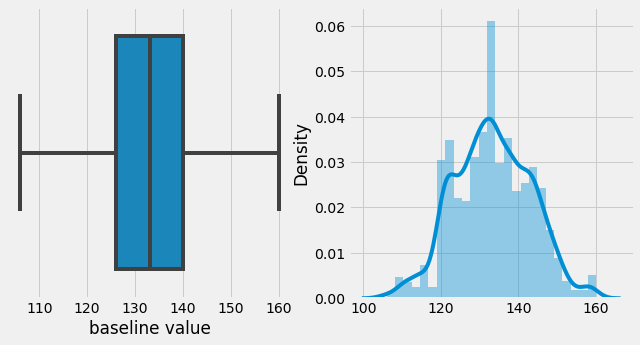

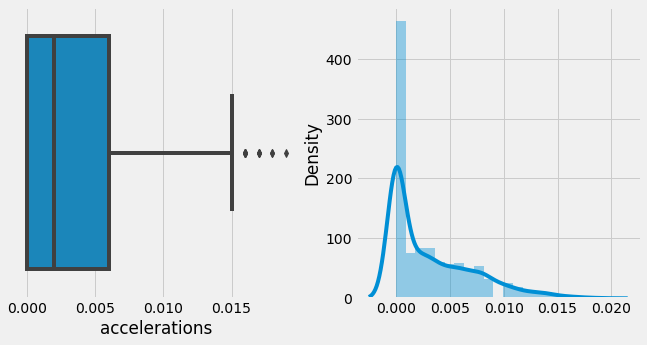

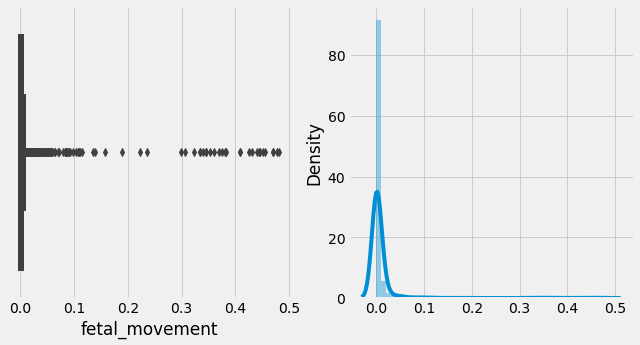

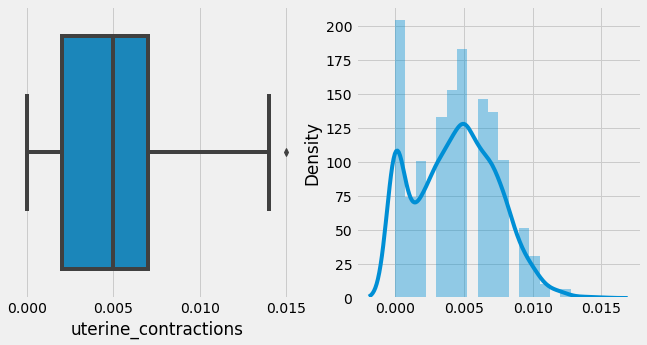

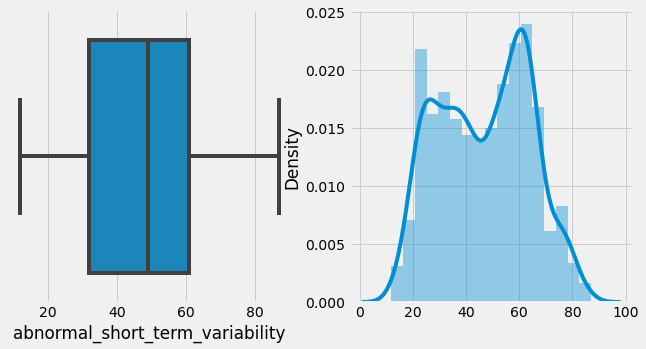

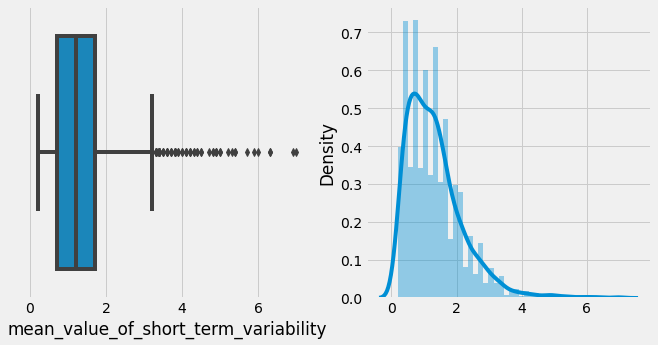

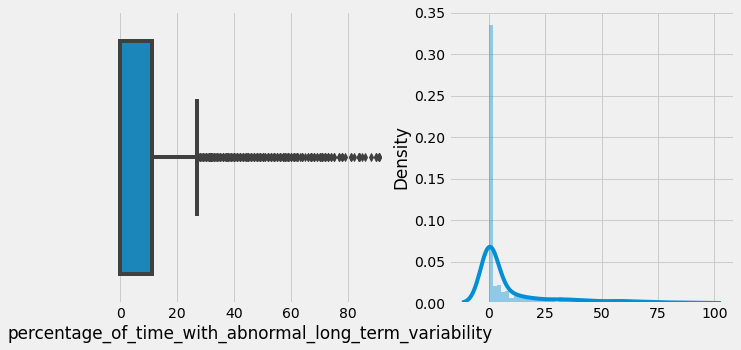

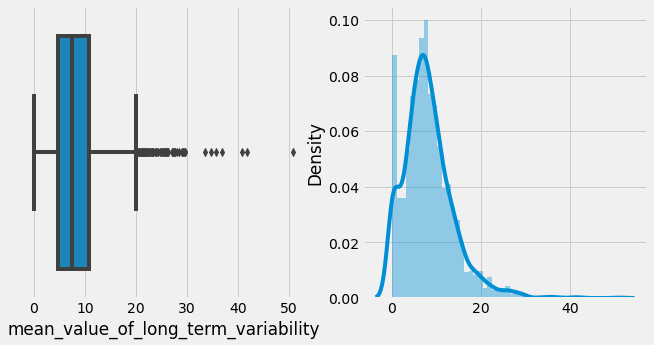

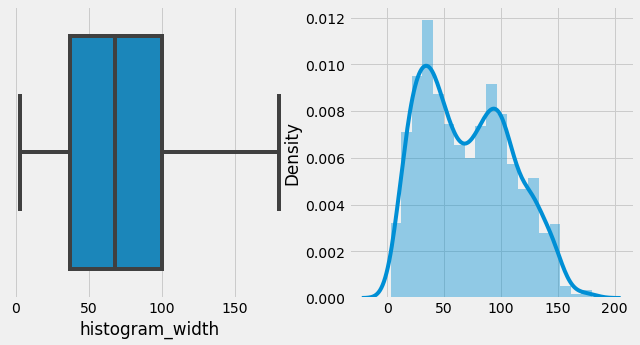

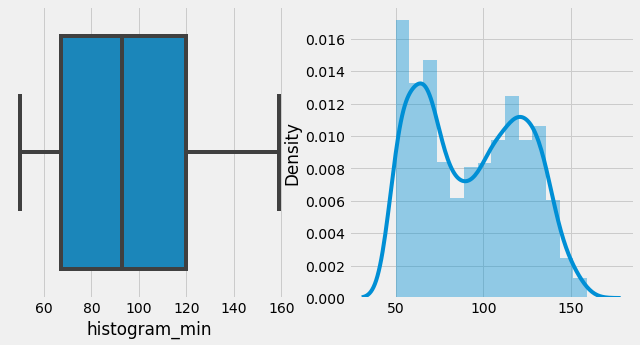

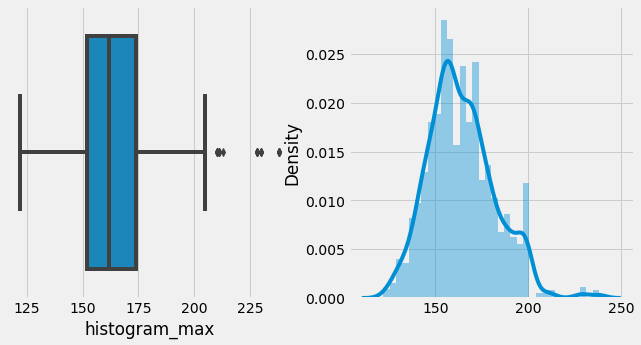

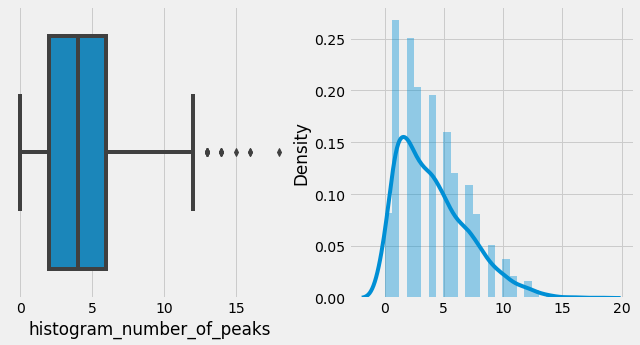

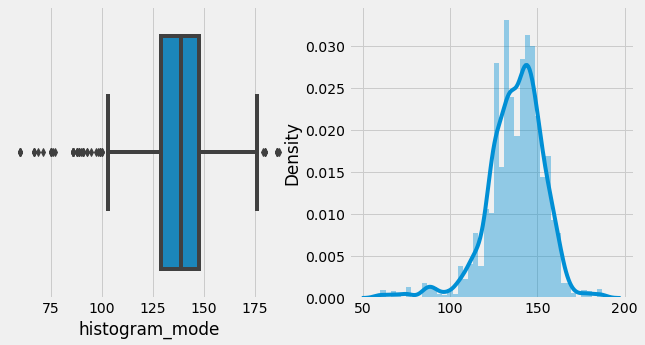

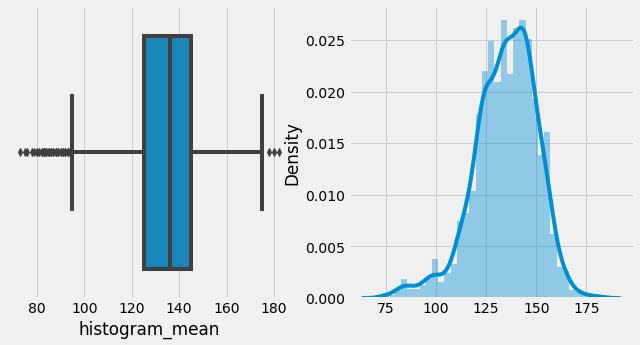

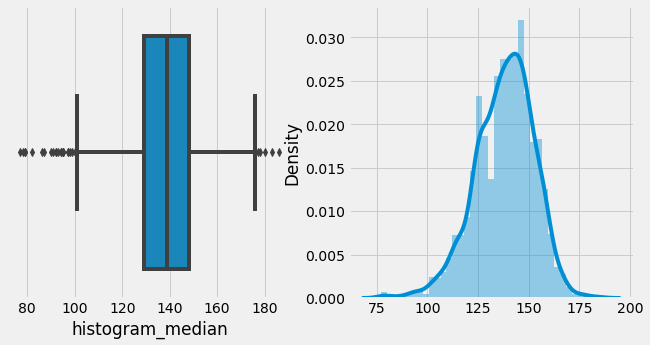

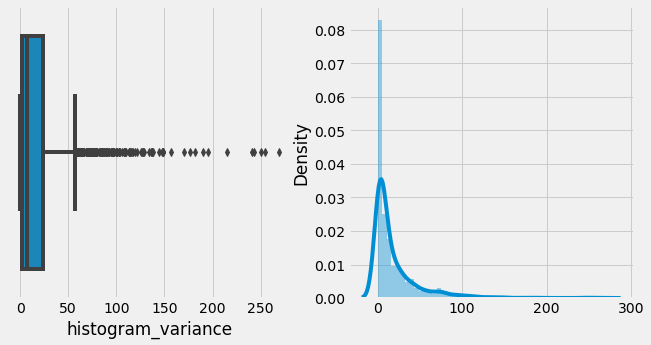

In [62]:
for i in num.columns:
    plt.figure(figsize=(10,5))
    ax1=plt.subplot(1,2,1)
    sns.boxplot(x=df[i],hue=df['fetal_health'],ax=ax1)
    ax2=plt.subplot(1,2,2)
    sns.distplot(x=df[i],ax=ax2)

In [65]:
cat.columns

Index(['light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'histogram_number_of_zeroes',
       'histogram_tendency', 'fetal_health'],
      dtype='object')

<AxesSubplot:xlabel='light_decelerations', ylabel='count'>

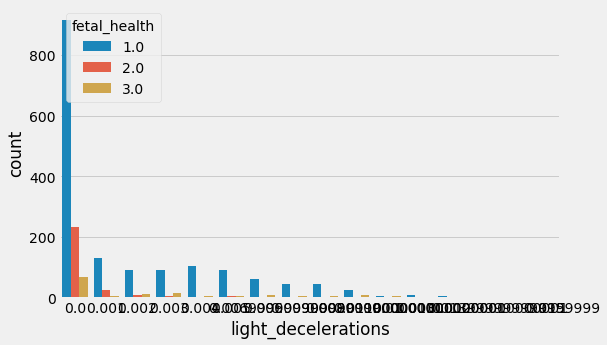

In [70]:
plt.figure(figsize=(8,5))
sns.countplot(df['light_decelerations'],hue=df['fetal_health'])


<AxesSubplot:xlabel='severe_decelerations', ylabel='count'>

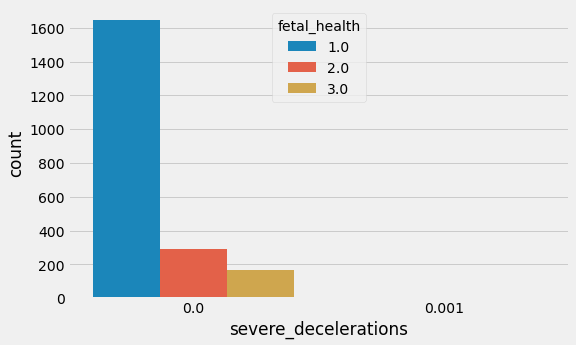

In [71]:
plt.figure(figsize=(8,5))
sns.countplot(df['severe_decelerations'],hue=df['fetal_health'])


<AxesSubplot:xlabel='histogram_tendency', ylabel='count'>

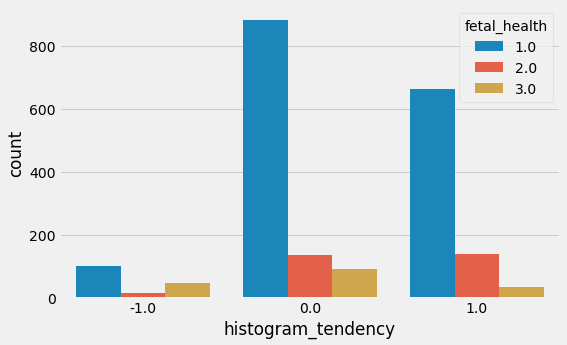

In [72]:
plt.figure(figsize=(8,5))
sns.countplot(df['histogram_tendency'],hue=df['fetal_health'])


In [75]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

### Multivariate Analysis

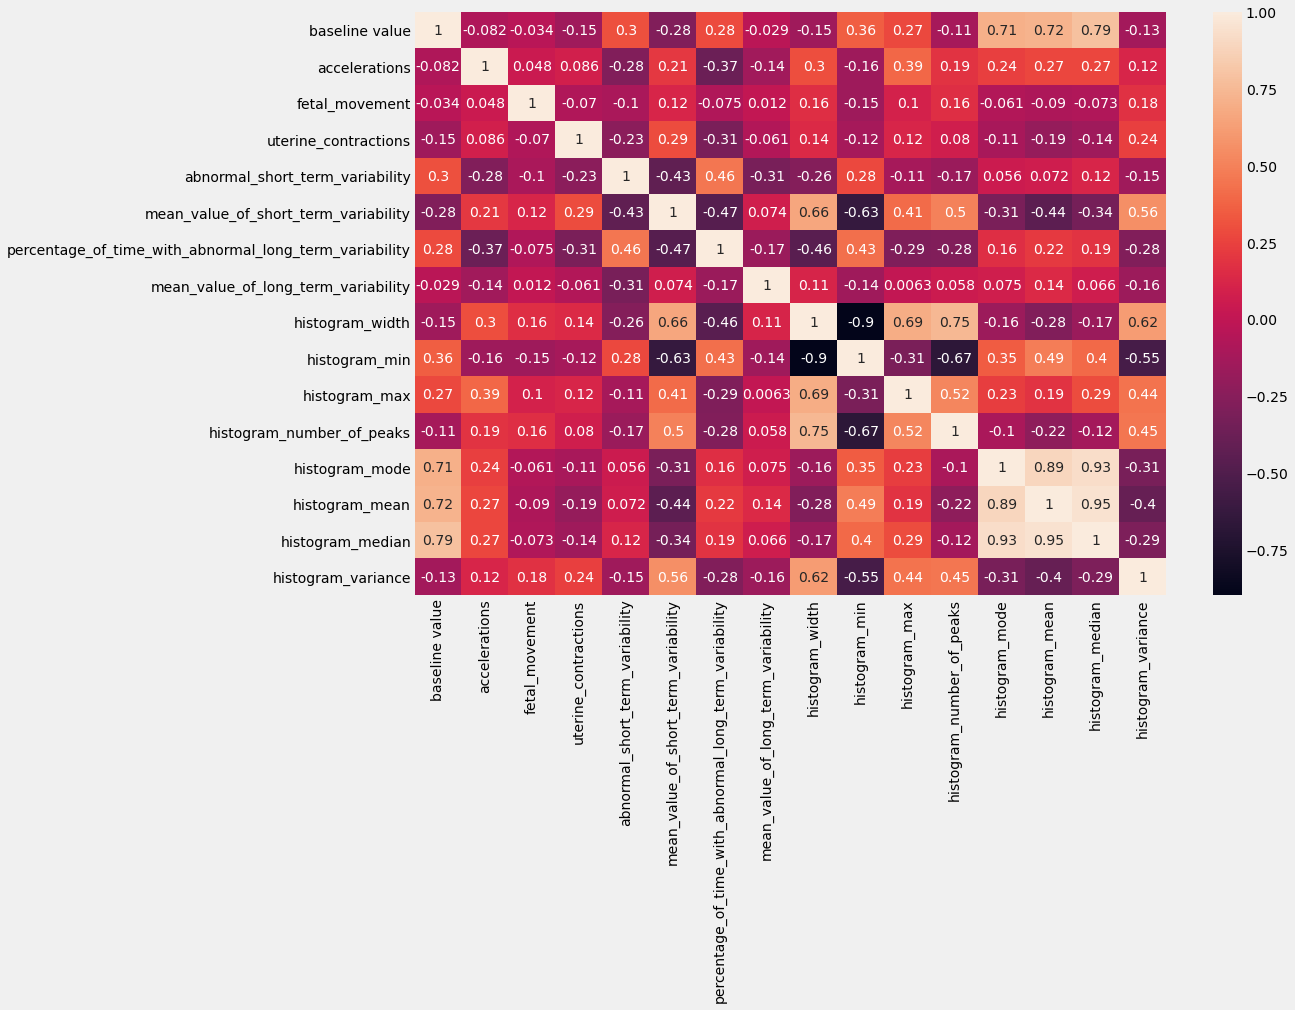

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [193]:
X=x.drop(columns=['histogram_mode','histogram_mean','histogram_median'],axis=1)
y=df.fetal_health

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

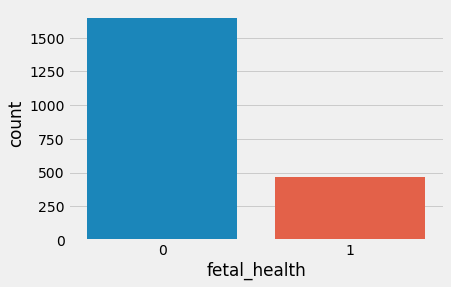

In [194]:
sns.countplot(y)

In [ ]:
#There is a imbalaced in target variable.

In [195]:
dum=pd.get_dummies(cat,drop_first=True)

In [196]:
dff=pd.concat([num,dum],axis=1)

In [209]:
y=y.astype('int')

In [210]:
xtrain,xtest,ytrain,ytest=train_test_split(dff,y,test_size=0.3,shuffle=True)
xtrain.shape

(1479, 47)

In [170]:
ytrain.shape

(1479,)

In [171]:
xtest.shape

(634, 47)

In [172]:
ytest.shape

(634,)

In [176]:
y.dtype

dtype('O')

In [177]:
y.value_counts()

0    1646
1     467
Name: fetal_health, dtype: int64

## Fitting a base model

## KNeighborsClassifier


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       524
           1       0.71      0.85      0.78       110

    accuracy                           0.91       634
   macro avg       0.84      0.89      0.86       634
weighted avg       0.92      0.91      0.92       634

[[486  38]
 [ 16  94]]


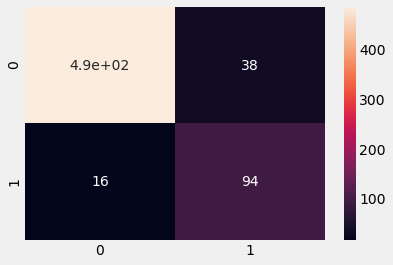

correct classification:  0.9148264984227129
Miss classification:  0.08517350157728706
Specifity:  85.45454545454545
Sensitivity:  92.74809160305344


In [218]:
kn=KNeighborsClassifier()
kn.fit(xtrain,ytrain)
ypredkn=kn.predict(xtest)
print(classification_report(ypredkn,ytest))
cm1=confusion_matrix(ypredkn,ytest)
print(cm1)
t1=cm1[1][0]

sns.heatmap(cm1,annot=True)
plt.show()
TN=cm1[0,0]
TP=cm1[1,1]
FP=cm1[0,1]
FN=cm1[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))

print('Specifity: ',((TP/(TP+FN))*100))
print('Sensitivity: ',((TN/(TN+FP))*100))
sp1=TP/(TP+FN)*100
se1=TN/(TN+FP)*100

In [241]:
a1=accuracy_score(ypredkn,ytest)*100
a1

91.48264984227129

## Random forest

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       521
           1       0.85      0.93      0.89       113

    accuracy                           0.96       634
   macro avg       0.92      0.95      0.93       634
weighted avg       0.96      0.96      0.96       634

[[502  19]
 [  8 105]]


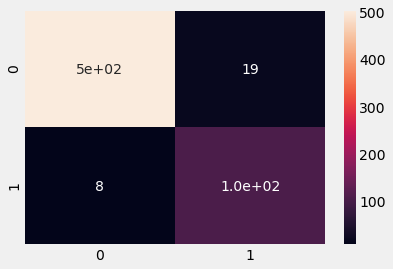

correct classification:  0.9574132492113565
Miss classification:  0.04258675078864353
Specifity:  92.92035398230088
Sensitivity:  96.3531669865643


In [213]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypredrf=rf.predict(xtest)
print(classification_report(ypredrf,ytest))
cm2=confusion_matrix(ypredrf,ytest)
print(cm2)
t2=cm2[1][0]

sns.heatmap(cm2,annot=True)
plt.show()
TN=cm2[0,0]
TP=cm2[1,1]
FP=cm2[0,1]
FN=cm2[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))

print('Specifity: ',((TP/(TP+FN))*100))
print('Sensitivity: ',((TN/(TN+FP))*100))
sp2=TP/(TP+FN)*100
se2=TN/(TN+FP)*100

In [242]:
a2=accuracy_score(ypredrf,ytest)*100
a2

69.2429022082019

## Decision Tree

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       500
           1       0.84      0.83      0.83       134

    accuracy                           0.93       634
   macro avg       0.90      0.89      0.90       634
weighted avg       0.93      0.93      0.93       634

[[479  21]
 [ 23 111]]


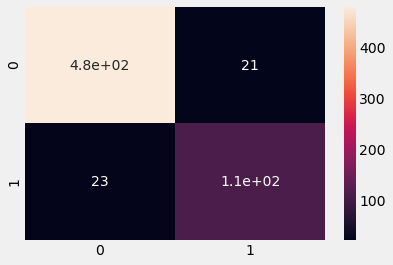

correct classification:  0.9305993690851735
Miss classification:  0.0694006309148265
Specifity:  82.83582089552239
Sensitivity:  95.8


In [221]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypreddt=dt.predict(xtest)
print(classification_report(ypreddt,ytest))
cm3=confusion_matrix(ypreddt,ytest)
print(cm3)
t3=cm3[1][0]

sns.heatmap(cm3,annot=True)
plt.show()
TN=cm3[0,0]
TP=cm3[1,1]
FP=cm3[0,1]
FN=cm3[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))

print('Specifity: ',((TP/(TP+FN))*100))
print('Sensitivity: ',((TN/(TN+FP))*100))
sp3=TP/(TP+FN)*100
se3=TN/(TN+FP)*100

In [243]:
a3=accuracy_score(ypreddt,ytest)*100
a3

93.05993690851734

## Ada Boost Classsifier

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       514
           1       0.83      0.92      0.87       120

    accuracy                           0.95       634
   macro avg       0.91      0.94      0.92       634
weighted avg       0.95      0.95      0.95       634

[[492  22]
 [ 10 110]]


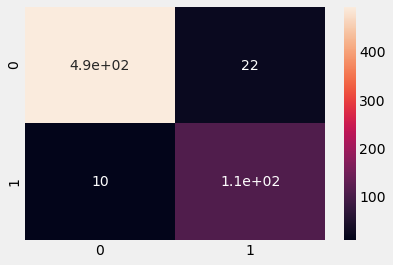

correct classification:  0.9495268138801262
Miss classification:  0.050473186119873815
Specifity:  91.66666666666666
Sensitivity:  95.71984435797665


In [222]:
ad=AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ypredad=ad.predict(xtest)
print(classification_report(ypredad,ytest))
cm4=confusion_matrix(ypredad,ytest)
print(cm4)
t4=cm4[1][0]

sns.heatmap(cm4,annot=True)
plt.show()
TN=cm4[0,0]
TP=cm4[1,1]
FP=cm4[0,1]
FN=cm4[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))

print('Specifity: ',((TP/(TP+FN))*100))
print('Sensitivity: ',((TN/(TN+FP))*100))
sp4=TP/(TP+FN)*100
se4=TN/(TN+FP)*100

In [244]:
a4=accuracy_score(ypredad,ytest)*100
a4

94.95268138801262

## XGB Classifier

[22:15:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       519
           1       0.83      0.96      0.89       115

    accuracy                           0.96       634
   macro avg       0.91      0.96      0.93       634
weighted avg       0.96      0.96      0.96       634

[[497  22]
 [  5 110]]


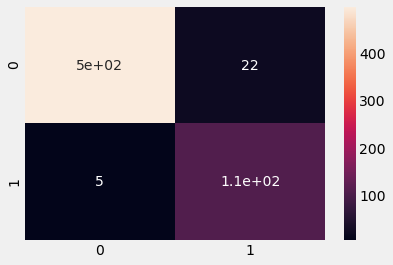

correct classification:  0.9574132492113565
Miss classification:  0.04258675078864353
Specifity:  95.65217391304348
Sensitivity:  95.76107899807322
[[497  22]
 [  5 110]]


In [253]:
xg=XGBClassifier()
xg.fit(xtrain,ytrain)
ypredxg=xg.predict(xtest)
print(classification_report(ypredxg,ytest))
cm5=confusion_matrix(ypredxg,ytest)
print(cm5)
t5=cm5[1][0]

sns.heatmap(cm5,annot=True)
plt.show()
TN=cm5[0,0]
TP=cm5[1,1]
FP=cm5[0,1]
FN=cm5[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))

print('Specifity: ',((TP/(TP+FN))*100))
print('Sensitivity: ',((TN/(TN+FP))*100))
sp5=TP/(TP+FN)*100
se5=TN/(TN+FP)*100
print(cm5)

In [245]:
a5=accuracy_score(ypredxg,ytest)*100
a5

95.74132492113566

## Hyper Tuning-Decision Tree

In [231]:
param_grid = {
    'max_depth': range(5, 30, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5


gr = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

gr.fit(xtrain,ytrain)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 30, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [232]:
gr.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       529
           1       0.65      0.82      0.73       105

    accuracy                           0.90       634
   macro avg       0.81      0.87      0.83       634
weighted avg       0.91      0.90      0.90       634

[[483  46]
 [ 19  86]]


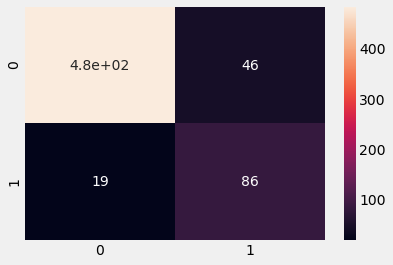

correct classification:  0.8974763406940063
Miss classification:  0.10252365930599369
Specifity:  81.9047619047619
Sensitivity:  91.30434782608695


In [234]:
dt1=DecisionTreeClassifier(criterion= 'gini',max_depth= 5,min_samples_leaf=50,
 min_samples_split=50)
dt1.fit(xtrain,ytrain)
ypreddt1=dt1.predict(xtest)
print(classification_report(ypreddt1,ytest))
cm6=confusion_matrix(ypreddt1,ytest)
print(cm6)
t6=cm6[1][0]

sns.heatmap(cm6,annot=True)
plt.show()
TN=cm6[0,0]
TP=cm6[1,1]
FP=cm6[0,1]
FN=cm6[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))

print('Specifity: ',((TP/(TP+FN))*100))
print('Sensitivity: ',((TN/(TN+FP))*100))
sp6=TP/(TP+FN)*100
se6=TN/(TN+FP)*100

In [246]:
a6=accuracy_score(ypreddt1,ytest)*100
a6

89.74763406940063

## Hyper Tuning-Random forest

In [235]:
param_grid = {
    'max_depth': range(5, 30, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5


gr = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv =n_folds, verbose = 1)

gr.fit(xtrain,ytrain)
gr.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 50,
 'min_samples_split': 100}

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       539
           1       0.66      0.92      0.77        95

    accuracy                           0.92       634
   macro avg       0.82      0.92      0.86       634
weighted avg       0.94      0.92      0.92       634

[[494  45]
 [  8  87]]


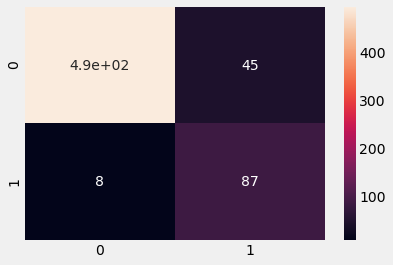

correct classification:  0.916403785488959
Miss classification:  0.083596214511041
Specifity:  91.57894736842105
Sensitivity:  91.65120593692022


In [237]:
rf1=RandomForestClassifier(criterion='gini',max_depth=25,min_samples_leaf=50,
 min_samples_split=100)
rf1.fit(xtrain,ytrain)
ypredrf1=rf1.predict(xtest)
print(classification_report(ypredrf1,ytest))
cm7=confusion_matrix(ypredrf1,ytest)
print(cm7)
t7=cm7[1][0]

sns.heatmap(cm7,annot=True)
plt.show()
TN=cm7[0,0]
TP=cm7[1,1]
FP=cm7[0,1]
FN=cm7[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))

print('Specifity: ',((TP/(TP+FN))*100))
print('Sensitivity: ',((TN/(TN+FP))*100))
sp7=TP/(TP+FN)*100
se7=TN/(TN+FP)*100

In [248]:
a7=accuracy_score(ypredrf1,ytest)*100
a7

91.6403785488959

## Type 2 error

In [238]:
model=["KNN","Random Forest","Decision Tree","AdaBoost","XGB","DT-Tuned","RF-Tuned"]
cmf=[t1,t2,t3,t4,t5,t6,t7]

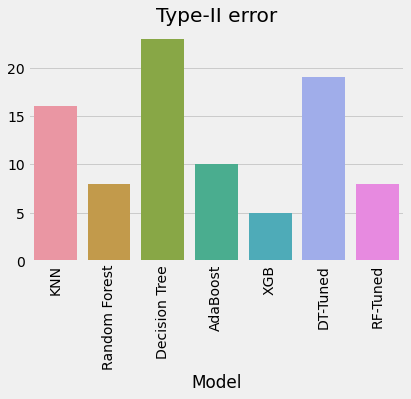

In [239]:
plt.title("Type-II error")
plt.xticks(rotation=90)
plt.xlabel("Model")
sns.barplot(model,cmf)
plt.show()

## Accuracy

In [249]:
model=["KNN","Random Forest","Decision Tree","AdaBoost","XGB","DT-Tuned","RF-Tuned"]

acc=[a1,a2,a3,a4,a5,a6,a7]
sp=[sp1,sp2,sp3,sp4,sp5,sp6,sp7]
se=[se1,se2,se3,se4,se5,se6,se7]

In [250]:
accuracy_overall=pd.DataFrame({'Model':model,'accuracy':acc,'Specifity':sp,'Sensitivity':se})
accuracy_overall

,Model,accuracy,Specifity,Sensitivity
0,KNN,91.482650,85.454545,92.748092
1,Random Forest,69.242902,92.920354,96.353167
2,Decision Tree,93.059937,82.835821,95.800000
3,AdaBoost,94.952681,91.666667,95.719844
4,XGB,95.741325,95.652174,95.761079
5,DT-Tuned,89.747634,81.904762,91.304348
6,RF-Tuned,91.640379,91.578947,91.651206


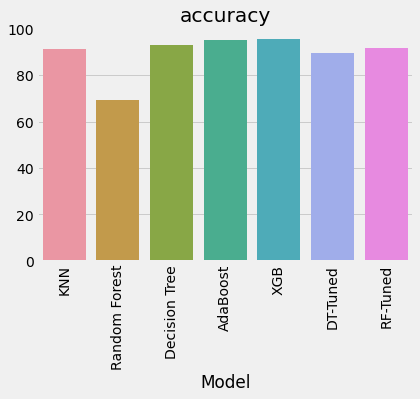

In [251]:
plt.title("accuracy")
plt.xticks(rotation=90)
plt.xlabel("Model")
sns.barplot(model,acc)
plt.show()

# XGB booster has the less type 2 error and the highest accuracy

## Feature importance

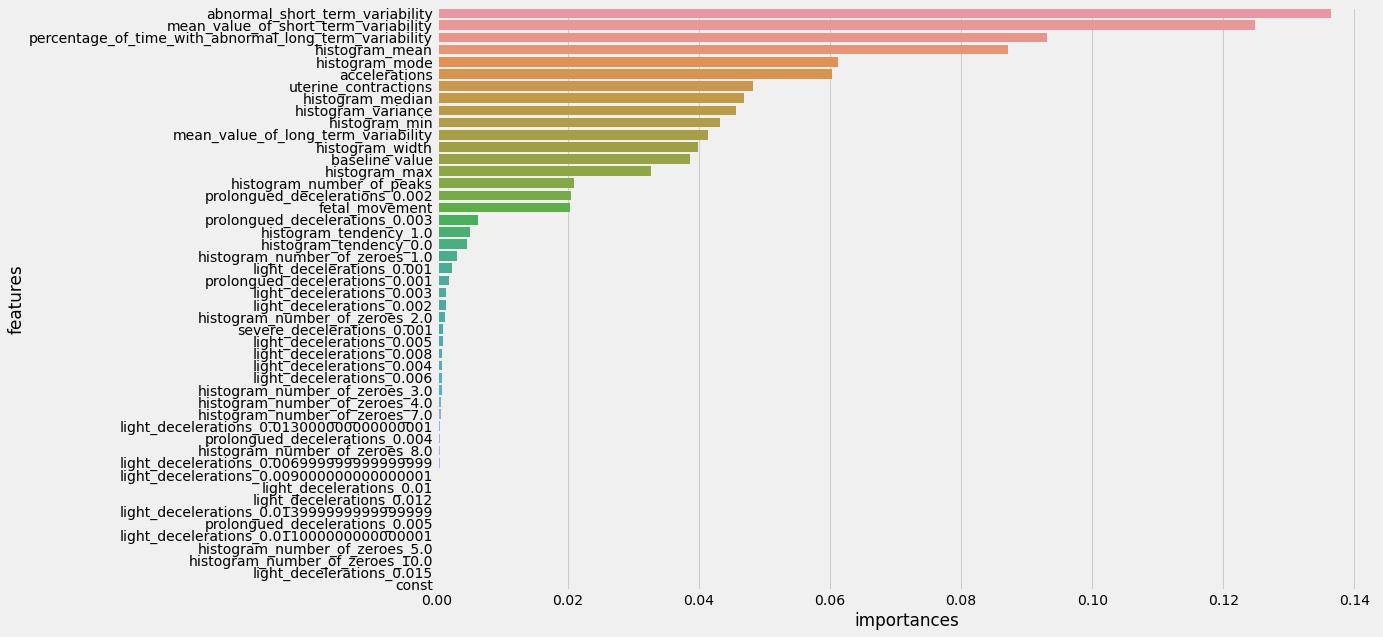

In [252]:
rf= RandomForestClassifier()
rf.fit(xtrain, ytrain)
ytrain_pred_rf = rf.predict(xtrain)
imp=pd.DataFrame({'features':xtrain.columns,'importances':rf.feature_importances_})
imp=imp.sort_values('importances',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot('importances','features',data=imp)
plt.show()